In [4]:
# Import the dependencies
import pandas as pd
import matplotlib as plt
import numpy as np

# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Define url
url = "https://api.openweathermap.org/data/2.5/weather?"

In [2]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations. 
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-23.22595805754925 10.972898812967202
64.75332206414427 85.7048183481914
28.726913728942534 -63.15315552990562
44.58107804611666 37.334793602358616
73.27594292669224 -72.14400506880155
-12.982893510706518 -151.27175717536852
-38.46068585597581 -78.24343923792391
-65.16897302687485 -68.05262752777384
27.29247624256702 75.04120773510249
-23.685889189015754 44.69588387345806
39.88117302417385 -152.28759199575083
88.49537803453558 -72.15084239792903
63.79449770569744 -2.777348713374437
21.930627457624666 97.48723150932523
-43.30223412289076 104.30177226521783
22.868895020623228 -40.825436414626694
-23.035975809167454 -127.39164111666446
-19.953639632924407 -57.423910689377166
17.191098982793875 -20.22308307247556
72.3989787772185 174.20103673658156
20.79984322900171 -28.262294684182876
79.82520810210147 -28.362634915636107
-0.9590395025695244 38.60989296178576
77.77485176728624 -18.67984586737896
65.33564156906016 -152.69794481121613
57.89860693405399 -15.68086879450766
49.37997193863353 -

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
        

613

In [8]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]  + "&appid=" + weather_api_key
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | henties bay
Processing Record 2 of Set 1 | turukhansk
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | abrau-dyurso
Processing Record 5 of Set 1 | clyde river
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | ramgarh
Processing Record 10 of Set 1 | betioky
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | brae
Processing Record 14 of Set 1 | maymyo
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | ladario
Processing Record 19 of Set 1 | santa maria
Processing Record 20 of Set 1 | komsomolskiy
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 22 of Set 1 | mwingi
Processing Record 23 of Set 1 | college
Processing Record 24 of Set 1

In [9]:
len(city_data)

561

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Henties Bay,-22.1160,14.2845,287.41,94,4,3.80,NA,2022-10-11 21:25:15
1,Turukhansk,65.8167,87.9833,274.63,98,100,6.53,RU,2022-10-11 21:25:16
2,Hamilton,39.1834,-84.5333,297.95,36,0,3.60,US,2022-10-11 21:21:17
3,Abrau-Dyurso,44.6900,37.5900,277.85,57,4,3.25,RU,2022-10-11 21:25:17
4,Clyde River,70.4692,-68.5914,267.28,73,75,5.66,CA,2022-10-11 21:25:18
5,Faanui,-16.4833,-151.7500,298.39,78,40,6.97,PF,2022-10-11 21:25:18
6,Lebu,-37.6167,-73.6500,284.90,78,64,2.78,CL,2022-10-11 21:25:19
7,Ushuaia,-54.8000,-68.3000,277.96,81,75,14.92,AR,2022-10-11 21:21:37
8,Ramgarh,23.6333,85.5167,298.18,91,83,0.71,IN,2022-10-11 21:25:20
9,Betioky,-23.7167,44.3833,297.08,58,16,1.27,MG,2022-10-11 21:25:20


In [11]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                  "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Henties Bay,NA,2022-10-11 21:25:15,-22.1160,14.2845,287.41,94,4,3.80
1,Turukhansk,RU,2022-10-11 21:25:16,65.8167,87.9833,274.63,98,100,6.53
2,Hamilton,US,2022-10-11 21:21:17,39.1834,-84.5333,297.95,36,0,3.60
3,Abrau-Dyurso,RU,2022-10-11 21:25:17,44.6900,37.5900,277.85,57,4,3.25
4,Clyde River,CA,2022-10-11 21:25:18,70.4692,-68.5914,267.28,73,75,5.66


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
import_data_file = "weather_data/cities.csv"
city_data_df=pd.read_csv(import_data_file, index_col = "City_ID")
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Henties Bay,NaN,2022-10-11 21:25:15,-22.1160,14.2845,287.41,94,4,3.80
1,Turukhansk,RU,2022-10-11 21:25:16,65.8167,87.9833,274.63,98,100,6.53
2,Hamilton,US,2022-10-11 21:21:17,39.1834,-84.5333,297.95,36,0,3.60
3,Abrau-Dyurso,RU,2022-10-11 21:25:17,44.6900,37.5900,277.85,57,4,3.25
4,Clyde River,CA,2022-10-11 21:25:18,70.4692,-68.5914,267.28,73,75,5.66


In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

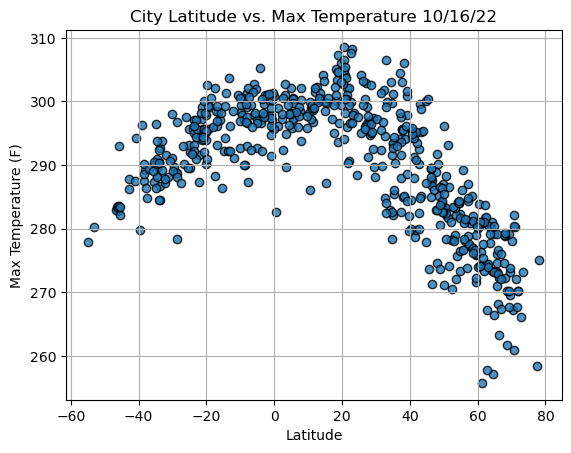

In [10]:
# Import time module
import time
from matplotlib import pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

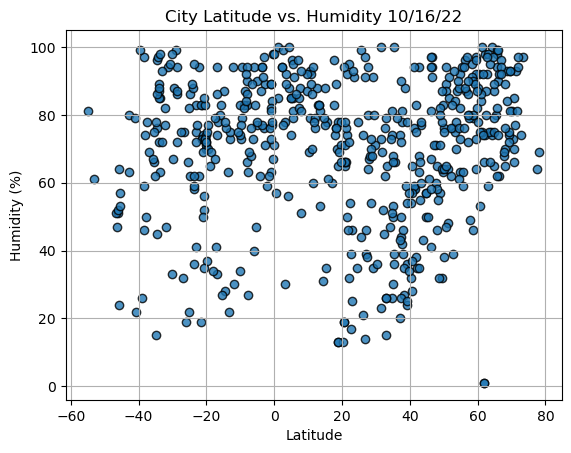

In [11]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

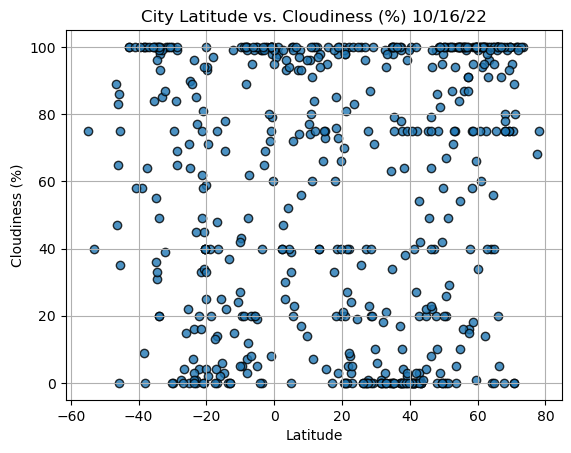

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

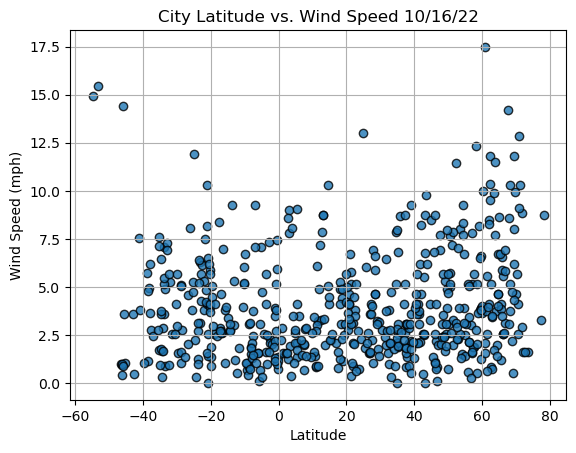

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                       Maymyo
Country                        MM
Date          2022-10-11 21:25:23
Lat                       22.0333
Lng                       96.4667
Max Temp                   290.64
Humidity                       95
Cloudiness                     40
Wind Speed                    0.9
Name: 13, dtype: object

In [19]:
city_data_df["Lat"]>=0

City_ID
0      False
1       True
2       True
3       True
4       True
       ...  
556     True
557    False
558    False
559     True
560    False
Name: Lat, Length: 561, dtype: bool

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

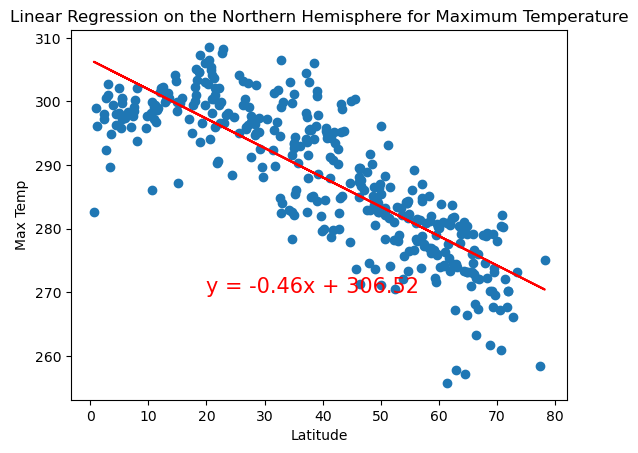

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(20,270))

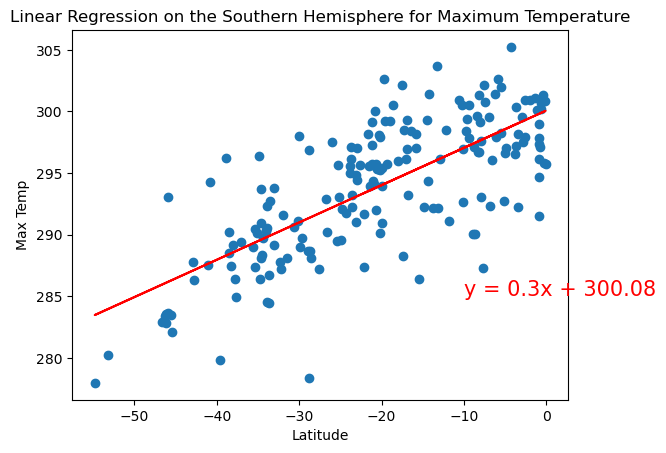

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-10,285))

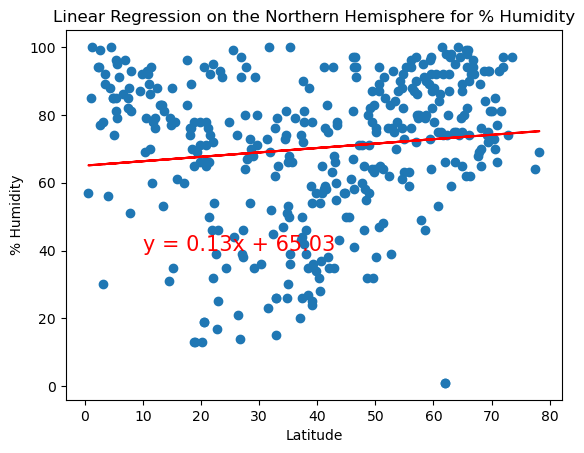

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(10,40))

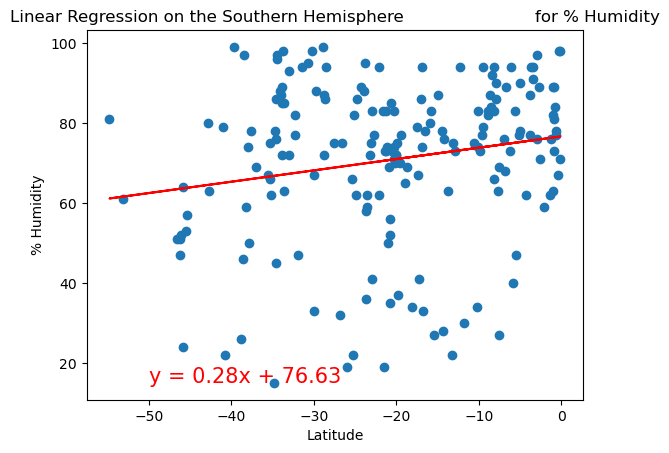

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

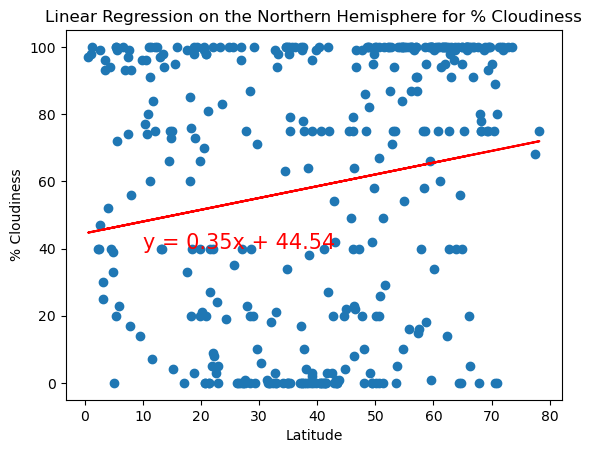

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,40))

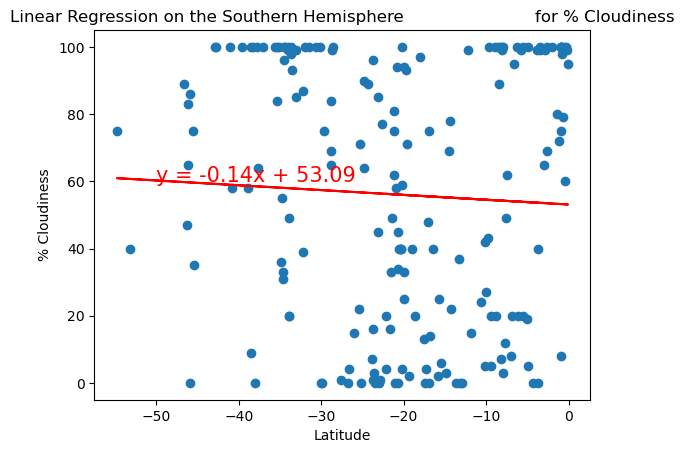

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

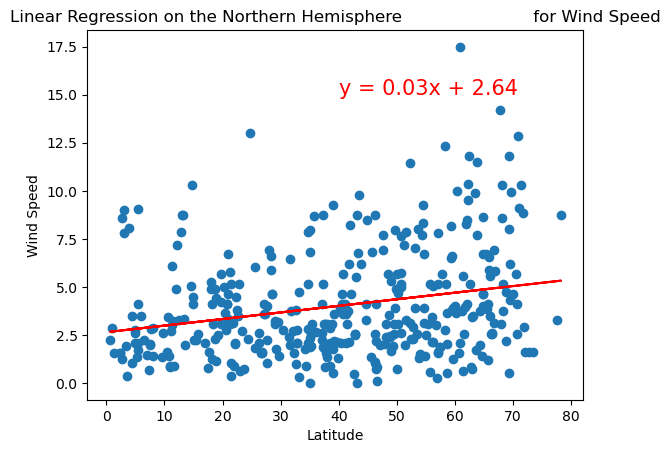

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,15))

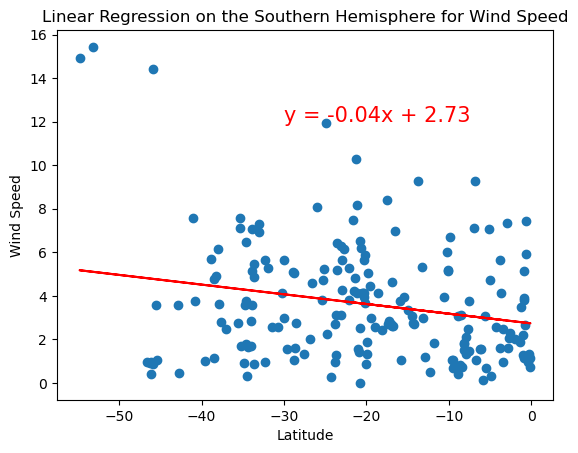

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for Wind Speed', 'Wind Speed',(-30,12))